REAL ESTATE PRICE-PREDICTOR 

In [634]:
#NOTES
#SUPERVISED ,REGRESSION ,BATCH LEARNING 
#PRFORMANCE MEASURE ROOT MEAN SQUARE ERROR

In [635]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [636]:
##FOR INFO
housing_df=pd.read_csv("data.csv")
# housing_df.head() 
# housing_df.info()  
# housing_df['CHAS'].value_counts()   
# housing_df.describe()

In [637]:
## FOR PLOTTING HISTOGRAM 
# housing_df.hist(bins=50,figsize=(20,15))
# plt.show()

In [638]:
# ##TRAIN TEST SPLITTING 

# def split_train_test(data,test_ratio):
#     np.random.seed(50)
#     shuffled=np.random.permutation(len(data))
#     test_set_size=int((len(data))*test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]


# train_set ,test_set = split_train_test(housing_df, 0.2)
# print(f"rows for train set :{len(train_set)}\n rows for test set :{len(test_set)}\n")


In [639]:
#TRAIN TEST SPLITTING  using sklearn 
from sklearn.model_selection import train_test_split
train_set ,test_set = train_test_split(housing_df,test_size=0.2,random_state=42)
print(f"rows for train set :{len(train_set)}\n rows for test set :{len(test_set)}\n")
# USE OF STRATIFY : FOR DISTRIBUTING ALL FEATURES POSSIBLE LIKE IN CHAS IF ALL 0 GO IN TRAIN


rows for train set :404
 rows for test set :102



In [640]:
from sklearn.model_selection import StratifiedShuffleSplit
srt_split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in srt_split.split(housing_df,housing_df['CHAS'],housing_df['RAD']):
    strat_train_set=housing_df.loc[train_index]
    strat_test_set=housing_df.loc[test_index]

# strat_test_set['CHAS'].value_counts()
# strat_train_set['CHAS'].value_counts()
# strat_train_set['RAD'].value_counts()
# strat_test_set['RAD'].value_counts()
# strat_test_set.info()
# strat_test_set.describe()

In [641]:
#now to change our training set to main set 
housing_df=strat_train_set.copy()

In [642]:
#PEARSON CORRELATION COEFFICIENT = HOW ONE VARIABLE REACT WITH INCREASE OR DECREASE IN OTHER
#PCC=1 STRONG +VE CORRELATION 

In [643]:
# CORRELATIONS
corr_matrix= housing_df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677328
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='INDUS', ylabel='RM'>],
       [<AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>,
        <AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='INDUS', ylabel='ZN'>],
       [<AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='INDUS', ylabel='LSTAT'>],
       [<AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesS

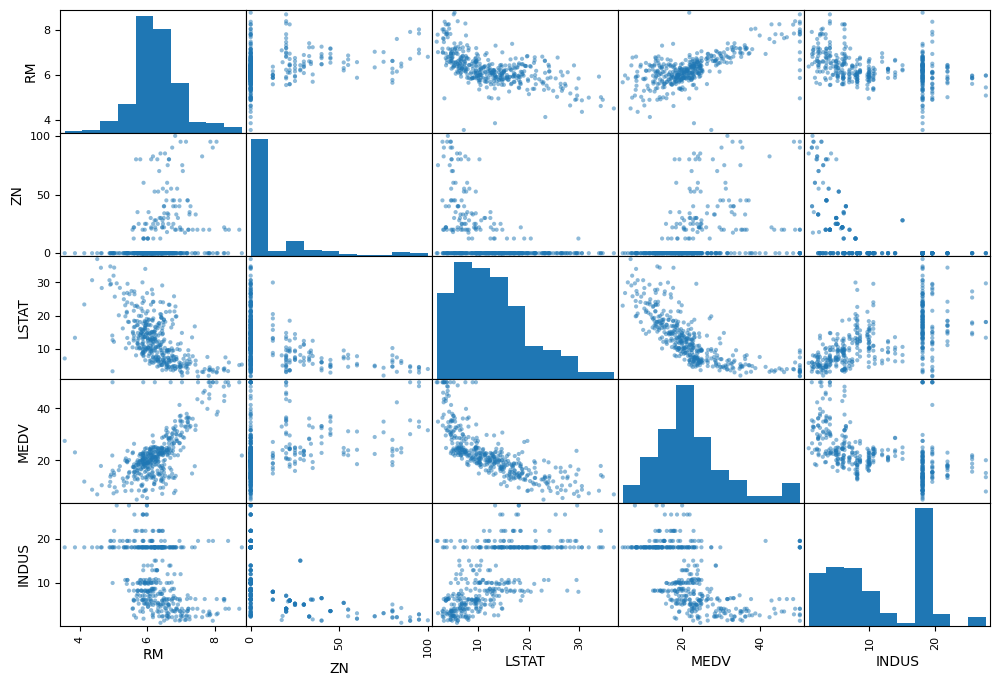

In [644]:
from pandas.plotting import scatter_matrix

attributes= ["RM" ,"ZN" ,"LSTAT" ,"MEDV","INDUS"]
scatter_matrix(housing_df[attributes],figsize=(12,8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

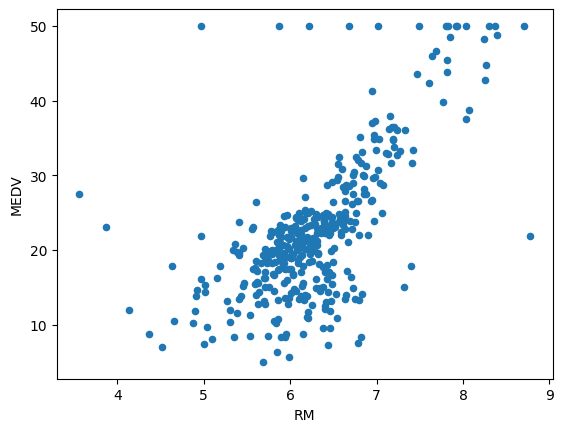

In [645]:
housing_df.plot(kind='scatter',x='RM',y="MEDV",alpha=1)


<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

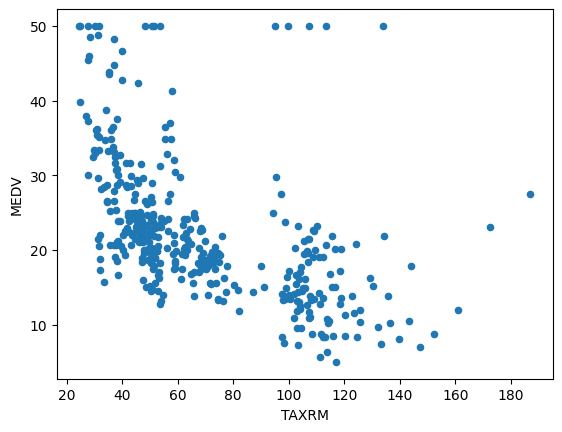

In [646]:
# TRYING ATTRIBUTE COMBINATIONS

housing_df["TAXRM"]=housing_df["TAX"]/housing_df["RM"]
# housing_df.head()

corr_matrix= housing_df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
# strong negative corr
housing_df.plot(kind = "scatter",x="TAXRM",y="MEDV",alpha=1)

In [647]:
# SEPERATING FEATURES AND LABELS 

housing_df = strat_train_set.drop("MEDV",axis=1)
housing_labels_df = strat_train_set["MEDV"].copy()

In [648]:
#Missing attributes 
# to take care 
    # 1] get rid of missing data points   not possible if more data points
    # 2]get rid of attributes             if bad correlations 
    # 3]set value to 0,mean ,median       

In [649]:
# a=housing_df.dropna(subset=["RM"]) #option 1   for change in original ,inplace =true 
# print(housing_df.shape)
# print(a.shape)

# housing_df.drop("RM",axis=1)    #option 2

In [650]:
#option 3
median_rm=housing_df["RM"].median()
b=housing_df["RM"].fillna(median_rm)
#original is unchanged 

In [651]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(strategy= "median")
imputer.fit(housing_df)
imputer.statistics_
imputer.statistics_.shape    #computed statics of median for all columns 

X = imputer.transform(housing_df)
housing_tr_df=pd.DataFrame(X,columns=housing_df.columns)    #transformed data set 
# housing_tr_df.describe()



In [652]:
##SCIKIT LEARN DESIGN 
# Primarily, three types of objects
# 1. Estimators It estimates some parameter based on a dataset. Eg. imputer. 
# It has a fit method and transform method. 
# Fit method Fits the dataset and calculates internal parameters
# 2. Transformers transform method takes input and returns output based on the 
# learnings from fit(). It also has a convenience function called fit_transform() 
# which fits and then transforms.
# 3. Predictors - Linear Regression model is an example of predictor. 
# fit() and predict() are two common functions. 
# It also gives score() function which will evaluate the predictions.

In [653]:
# FEATURE SCALING ML ALGO PERFORM WELL IF ALL FEATURES ARE OF SAME SCALE 

# 1. Min-Max scaling (Normalization) =(value-min)/(max-min)  all values to 0 to 1
#           sklearn provide   MinMaxScalar class 


# 2. Standardization = (value-mean)/standard deviation
#      sklearn provide StandardScalar 

In [669]:
# CREATING PIPELINE( aisa kaam jo automate kare )


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline= Pipeline([                             #take lists as  inputs 
                    ('imputer',SimpleImputer(strategy="median" ))
                    ,('std_scaler',StandardScaler())        #...can add as many as we want 
])         

housing_num_tr = my_pipeline.fit_transform(housing_df)     #this is numpy array 
housing_num_tr[0]
# housing_num_tr.shape 



array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23894184, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [655]:
# SELECTING DESIRED MODEL 

In [656]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor

model1 = LinearRegression()
model1.fit(housing_num_tr,housing_labels_df)


model2 = DecisionTreeRegressor()
model2.fit(housing_num_tr,housing_labels_df)


model3 = RandomForestRegressor()
model3.fit(housing_num_tr,housing_labels_df)

RandomForestRegressor()

In [657]:
some_data= housing_df.iloc[:5]
some_labels = housing_labels_df[:5]

prepared_data= my_pipeline.transform(some_data)

model1.predict(prepared_data)

model2.predict(prepared_data)

model3.predict(prepared_data)


C:\Users\aryan\AppData\Local\Temp\ipykernel_8244\2638405857.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  some_labels = housing_labels_df[:5]


array([22.577, 25.363, 16.555, 23.293, 23.329])

In [658]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [659]:
# EVALUATING THE MODEL 
from sklearn.metrics import mean_squared_error

housing_predictions = model1.predict(housing_num_tr)        # data ko pipeline se gujarne ke baad data predict kar rahe hai
model1_mse = mean_squared_error(housing_labels_df,housing_predictions)
model1_rmse = np.sqrt(model1_mse)

print(f"model1_mse : {model1_mse}\n model1_rmse: {model1_rmse}\n")



housing_predictions = model3.predict(housing_num_tr)        # data ko pipeline se gujarne ke baad data predict kar rahe hai
model3_mse = mean_squared_error(housing_labels_df,housing_predictions)
model3_rmse = np.sqrt(model3_mse)

print(f"model3_mse : {model3_mse}\n model3_rmse: {model3_rmse}\n")
#model 3  overfitting happen 



housing_predictions = model2.predict(housing_num_tr)        # data ko pipeline se gujarne ke baad data predict kar rahe hai
model2_mse = mean_squared_error(housing_labels_df,housing_predictions)
model2_rmse = np.sqrt(model2_mse)

print(f"model2_mse : {model2_mse}\n model2_rmse: {model2_rmse}\n")
#model 2  overfitting happen 

model1_mse : 23.38480254427435
 model1_rmse: 4.835783550188568

model3_mse : 1.517374212871287
 model3_rmse: 1.2318174429968456

model2_mse : 0.0
 model2_rmse: 0.0



In [660]:
#USING BETTER EVALUATION TECNIQUE 
# CROSS VALIDATION 
# divide training data into groups then testing 1 group against model train by other groups 
# 1 2 3 4 5 6 7 9 10 eg leaving 1 training on 2 3 4 ..10
#                       leaving 2 training on 1 3 4 ..10
#  then finding mse of errors 

In [661]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(model1 ,housing_num_tr,housing_labels_df,scoring="neg_mean_squared_error",cv=10)
model1_rmse_scores = np.sqrt(-scores1)
print("model1_rmse_scores:",model1_rmse_scores)
print("\n")

scores2 = cross_val_score(model2 ,housing_num_tr,housing_labels_df,scoring="neg_mean_squared_error",cv=10)
model2_rmse_scores = np.sqrt(-scores2)
print("model2_rmse_scores:",model2_rmse_scores)
print("\n")

scores3 = cross_val_score(model3 ,housing_num_tr,housing_labels_df,scoring="neg_mean_squared_error",cv=10)
model3_rmse_scores = np.sqrt(-scores3)
print("model3_rmse_scores:",model3_rmse_scores)
print("\n")

model1_rmse_scores: [4.17733979 4.27601375 5.1179023  3.84869804 5.35463669 4.33344638
 7.56317746 5.49677129 4.12373814 6.05260415]


model2_rmse_scores: [4.10234912 5.75273    5.13662127 4.04902879 3.52136337 4.17049158
 7.26894078 4.03961632 3.60288079 4.14173877]


model3_rmse_scores: [2.95075113 2.96742559 4.53105011 2.67351159 3.18367496 2.79721674
 4.90510081 3.25551426 3.29864546 3.30084734]




In [662]:
def print_statics(sc ,name):
    print("for",name,"\nMean:",sc.mean(),"\nStandard deviation",sc.std())

In [663]:
print_statics(model1_rmse_scores,"model1_rmse_scores")
print("\n")
print_statics(model2_rmse_scores,"model2_rmse_scores")
print("\n")
print_statics(model3_rmse_scores,"model3_rmse_scores")

for model1_rmse_scores 
Mean: 5.034432799468798 
Standard deviation 1.0858636461776148


for model2_rmse_scores 
Mean: 4.578576077717079 
Standard deviation 1.1023993800977139


for model3_rmse_scores 
Mean: 3.3863737976541097 
Standard deviation 0.7007568014345688


In [664]:
# SAVING THE MODEL 
from joblib import dump,load
dump(model3,'Real-Estate-Price-Predictor.joblib')

['Real-Estate-Price-Predictor.joblib']

In [665]:
#  MODEL TESTING 


X_test = strat_test_set.drop(["MEDV"],axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)

final_predictions = model3.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

print("final error=",final_rmse)


final error= 2.99377236943626
